In [19]:
import os
import nibabel as nib
from nibabel.testing import data_path
import matplotlib
from matplotlib import pyplot as plt
from nilearn import plotting, image
from nilearn.image import mean_img
import numpy as np

from functions import normalize_array, create_volume

In [5]:
# link to fMRI scan
input_fmri_file = "/Users/joachimpfefferkorn/Documents/mri_data/To_Share/T1w_Space/filtreg_sm_dspk_sk_sub-AG5_ses-baseline_task-Newresting1HB6scan_space-T1w_desc-preproc_bold.nii"

In [6]:
andrew_brain_filename = os.path.join(data_path, input_fmri_file)
andrew_brain_img = nib.load(andrew_brain_filename) #why is this a join?

In [7]:

andrew_brain_data = andrew_brain_img.get_fdata()
normalized_brain_array = normalize_array(andrew_brain_data)

In [8]:
normalized_brain_vol = create_volume(normalized_brain_array)

# Comparing to a Base
These results won't be meaningful, but they might be a good MVP of your volume renderer.
Instead of comparing to a control condition, let's just compare to the first 3D volume in the series.
Later you can compare this to something more meaningful.

In [11]:
output_folder = "/Users/joachimpfefferkorn/repos/neurovolume/output/npy_seq"

In [12]:
# MVP/Testing CAVEATS (READ BEFORE USING!:
# Not applicable to any kind of meaningful analysis
# only tests against a single, 3D slice as the control.
# Difference is calculated as ABSOLUTE as I don't know how VDBs handle negative numbers
# This probably will have to be a seperate variable:
#   As in, there is the unsigned density (0-1) and then some kind of signed float that represents the activation

# lots of possible x/y/z/row/col gore but hopefully that just results in mirroring of final output.

def create_4D_volume_MVP(experimental_4D, control_3D_test_variant):
    fmri_volume = np.zeros(experimental_4D.shape)
    for time_index in range(experimental_4D.shape[3]):
        for z_index in range(experimental_4D.shape[2]):
            for y_index in range(experimental_4D.shape[1]):
                for x_index in range(experimental_4D.shape[0]): 
                    density = np.absolute(control_3D_test_variant[x_index,y_index,z_index] - fmri_volume[x_index, y_index, z_index, time_index])
                    fmri_volume[x_index,y_index,z_index,time_index] = density
                    #print(f"time: {time}, pos: {x_index},{y_index},{z_index}, density: {density}")
        vol_frame = "{:03d}".format(time_index)
        np.save(f"{output_folder}/fmri_{vol_frame}.npy", fmri_volume[:,:,:,time_index])
        print(f"saved {vol_frame}")

In [22]:
def view_mid_slice(slice):
    base_slice = slice[:][:][50] #hard coded for now
    plt.imshow(base_slice, cmap="viridis")
    plt.show()


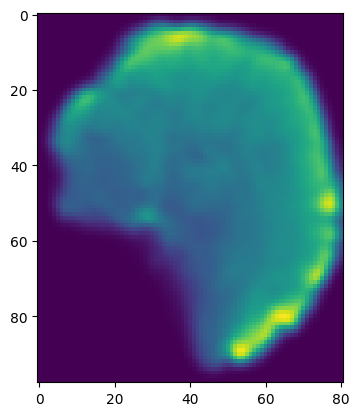

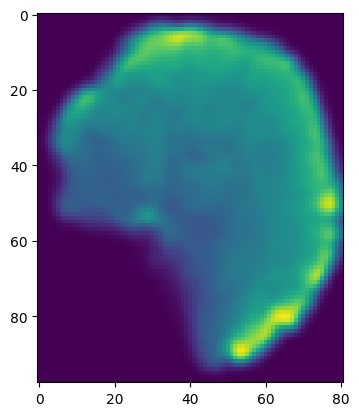

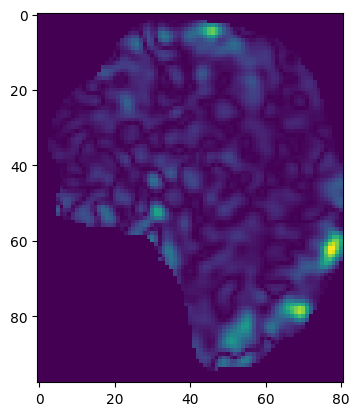

In [24]:
#pulling out the base:
experimental_mid_slice = normalized_brain_vol[:,:,:,200]
control_mid_slice = normalized_brain_vol[:,:,:,0]

diff = np.absolute(control_mid_slice - experimental_mid_slice)

view_mid_slice(experimental_mid_slice)
view_mid_slice(control_mid_slice)
view_mid_slice(diff)
#viewing a slice


In [3]:
create_4D_volume_MVP(normalized_brain_vol, normalized_brain_vol[:,:,:,0])

NameError: name 'normalized_brain_vol' is not defined